## Dolly Zoom: Compute focal length

### 1) Introduction

In this lab, we will implement Dolly Zoom effect used by film-makers to create a sensation of vertigo, a ``falling-away-from-oneself feeling''. This lab is fairly simple and is meant to introduce you to the concepts of projection and focal length. It keeps the size of an object of interests constant in the image, while making the foreground and background objects appear larger or smaller by adjusting focal length and moving the camera. You will simulate the Dolly Zoom effect with a synthetic scene as shown in next Figure, which illustrates two cubes and one pyramid seen from the top view.

<img src='../imgs/dolly_top_view.png' width="500"/>

### 2) Dolly Zoom Effect

A point in 3D is projected onto the image plane through the pinhole (center of projection, COP):

$$u = f\frac{X}{Z} \ \ \ \ \ \ \ \ \ \ \ v = f\frac{Y}{Z}$$

where $(u, v)$ is the image coordinate of the projection, $(X, Y, Z)$ is the 3D point, and  is the focal length of the camera. When the camera moves along with its Z-axis, the depth, Z, changes and therefore, the projection, $(u, v)$, changes. In our paticular case the $Z$ of interest is $d_{ref}$, the depth of the objects in the scene. In the following discussion we will only mention the $u$ coordinate to simplify the equations, as we are focused mainly on height for the dolly zoom. This projection change produced by the depth change can be compensated by adjusting focal length:

where $pos$ is the movement of the camera along its $Z$ axis ($+$ direction indicates approaching to objects) and $f'$ is the modified focal length. $f_{ref}$ and $d_{ref}$ are the focal length and depth of an object in the original image, respectively. Dolly zoom effect exploits the compensation between depth and focal length, which produces depth sensation. The relationship between all the variable names as given in the code is described in the next figure, and when implementing the description in the code you should reference it.

<img src="../imgs/dolly_relations.png" width="400"/>

Finally, the next figure illustrates the focal length/depth compensation: the camera moves away from the object while changing its focal length such that the height of the object A, $h_1 = 400$, in both original and moved images remains constant. Note that the heights of the other background objects are changed due to this effect.

<img src='../imgs/dolly_view.png' width="600"/>

### 3) Implementation

For the first part of this lab, you need to implement the function `compute_focal_length`. Given the depth of the object of interest $d_{ref}$, and the focal length $f_{ref}$ of the camera for the original image, you need to estimate the modified focal length $f'$, such that the height of the object remains constant as the camera moves in the -axis (different input $pos$ values). When you have implemented the function, you can demonstrate the dolly soom effect in the synthetic scene above by using the `run_dolly_zoom` script we provide in the zip file `Lab1.zip`.

In [10]:
function [ f ] = compute_focal_length( d_ref, f_ref, pos )
% compute camera focal length using given camera position
%
% Input:
% - d_ref: 1 by 1 double, distance of the object whose size remains constant
% - f_ref: 1 by 1 double, previous camera focal length
% - pos: 1 by n, each element represent camera center position on the z axis.
% Output:
% - f: 1 by n, camera focal length
    pos = d_ref - pos;
    f = (f_ref.*pos)./d_ref;
end

### Code to call your function

In [11]:
d_ref = 4;
f_ref = 400;
pos = -5;
f = compute_focal_length( d_ref, f_ref, pos )

f =  900


## Dolly Zoom: Compute focal length and position

### Dolly Zoom: Compute focal length and position

For the second part of this lab, you need to implement the function `compute_f_pos`. This time you are given the distances of two objects ($d_{1\_ref}$ and $d_{2\_ref}$) and their corresponding heights in the physical world ($H_1$ and $H_2$ respectively), and for a specified original focal length $f_{ref}$, you need to estimate the modified focal length $f'$ such that the ratio of the heights of the two objects in the image $\frac{h_1}{h_2}$ is the same as the input value $ratio$, while the height $h_1$ of the first object remains constant. The description and the notation of the problem is the same as the one presented in the previous part, so you can use it as reference.

In [20]:
function [ f, pos ] = compute_f_pos( d1_ref, d2_ref, H1, H2, ratio, f_ref )
% compute camera focal length and camera position to achieve centain ratio
% between objects
%
% Input:
% - d1_ref: distance of the first object
% - d2_ref: distance of the second object
% - H1: height of the first object in physical world
% - H2: height of the second object in physical world
% - ratio: ratio between two objects (h1/h2)
% - f_ref: 1 by 1 double, previous camera focal length
% Output:
% - f: 1 by 1, camera focal length
% - pos: 1 by 1, camera position

    % calculate h1 and h2
    h1 = f_ref .* H1 ./ d1_ref;
    h2 = f_ref .* H2 ./ d2_ref;
    
    h1_n = h1;
    h2_n = h1_n ./ ratio;
    
    % calculate the position
    pos = ((h2_n .* H1 .* d2_ref) - (h1_n .* H2 .* d1_ref))/((h2_n .* H1) - (h1_n .* H2));
    
    % calculate the focal length
    f = (h1 ./ H1) .* (d1_ref - pos); 
end

### Code to call your function

In [21]:
d1_ref = 4;
d2_ref = 20;
H1 = 4;
H2 = 6;
ratio = 2;
f_ref = 400;
[ f, pos ] = compute_f_pos( d1_ref, d2_ref, H1, H2, ratio, f_ref )

f =  800
pos = -4


# TESTING FUNCTIONS

In [28]:
function project_objects( f, pos, points, fid )
    % render synthetic image using given camera focal length and camera
    % position
    %
    % Input:
    % - f: double camera focal length
    % - pos: double represent camera center position in z axis.
    % - points: 3D coordinates for vetice on polygons (use "load points.mat" to get)
    % Output:
    % - img: 1080*1920*3 matrix, the output render image
    %
    % after runing Dolly_Zoom
    % you can use 'imwrite(img, 'output.png');' to save the image.

    color_1 = [0 1 0];
    color_2 = [1 0 1];
    color_3 = [0 0 1];
    
    points_A = points.points_A;
    points_B = points.points_B;
    points_C = points.points_C;
    
    figure(fid);
    % object 3
    p2d = project(points_C, f, pos);
    color = color_3;
    fill(p2d([1,2,4,3],1), p2d([1,2,4,3],2), color);
    fill(p2d([3,4,6,5],1), p2d([3,4,6,5],2), color);
    
    % object 1
    p2d = project(points_A, f, pos);
    color = color_1;
    fill(p2d([1,2,4,3],1), p2d([1,2,4,3],2), color);
    fill(p2d([3,4,6,5],1), p2d([3,4,6,5],2), color);

    % object 2
    p2d = project(points_B, f, pos);
    color = color_2;
    fill(p2d([1,2,3],1), p2d([1,2,3],2), color);
    fill(p2d([2,3,4],1), p2d([2,3,4],2), color);
end

function [ p2d ] = project( p3d, f, pos )
    % use for compute vertex image position from given vertex 3D position and
    % camera focal length and camera position

    % Input:
    % - p3d: n by 3, 3D vertex position in world coordinate system
    % - f: double, camera focal length
    % - pos : double, camera center position
    % Output:
    % - p2d: n by 2, each row represents vertex image position, in pixel unit

    p2d(:,1) = p3d(:,1)*f./(p3d(:,3) - pos) + 960;
    p2d(:,2) = p3d(:,2)*f./(p3d(:,3) - pos) + 540;

end

points = load('../lab/asset_1/points.mat')
d_ref = 4;
f_ref = 400;
pos = 0 : -0.1 : -9.9;

d1_ref = 4;
d2_ref = 20;
H1 = points.points_A(1,2) - points.points_A(2,2)
H2 = points.points_C(1,2) - points.points_C(2,2)
ratio = 2;

points =

  scalar structure containing the fields:

    points_A =

      -6.0000   2.0000   4.0000
      -6.0000  -2.0000   4.0000
      -4.0000   2.0000   3.0000
      -4.0000  -2.0000   3.0000
      -2.0000   2.0000   4.0000
      -2.0000  -2.0000   4.0000

    points_B =

       1.00000  -2.00000   4.00000
       2.00000   1.00000   3.00000
       2.00000  -2.00000   2.00000
       6.00000  -2.00000   4.00000

    points_C =

       -8.0000    3.0000   20.0000
       -8.0000   -3.0000   20.0000
       -4.0000    3.0000   20.0000
       -4.0000   -3.0000   20.0000
       -4.0000    3.0000   24.0000
       -4.0000   -3.0000   24.0000


H1 =  4
H2 =  6


Processing frame 001 / 1...

Processing frame 001 / 1...


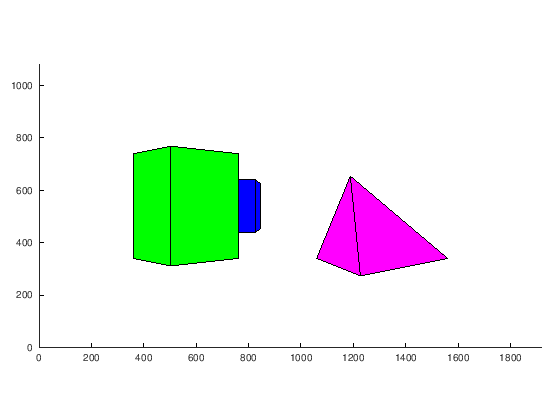

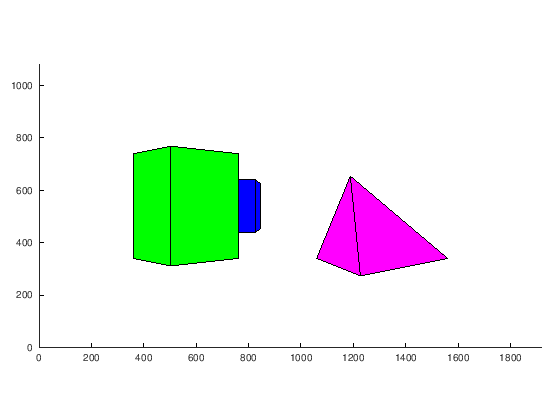

In [30]:
%% Dolly Zoom: keep one object's height constant 
f = compute_focal_length(d_ref, f_ref, pos);
for i = 1 : length(f)
    if i == 1
        fprintf('Processing frame %03d / %d...', i, length(f));
    else
        fprintf(repmat('\b',1,12));  
        fprintf('%03d / %d...', i, length(f));
        clf;
    end
    
    figure(1), hold on, axis equal;
    xlim([0,1920]), ylim([0,1080]);
    project_objects(f(i), pos(i), points, 1);
    pause(0.1);
end;
fprintf('\n');

%% Dolly Zoom:  keep one object's height constant and adjust another objects height

[f, pos] = compute_f_pos(d1_ref, d2_ref, H1, H2, ratio, f_ref);
figure(2), hold on, axis equal;
xlim([0,1920]), ylim([0,1080]);
project_objects(f, pos, points, 2);